# Figure 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
import os
import functools
import upsetplot

warnings.filterwarnings('ignore')
plt.rc('font', family='Helvetica')

# 2b

In [3]:
CBE_counts = pd.read_csv('mageck/CBE_bc_counts.txt', sep='\t')
ABE_counts = pd.read_csv('mageck/ABE_bc_counts.txt', sep='\t')
CBE_counts = CBE_counts[CBE_counts.columns[2:]]
ABE_counts = ABE_counts[ABE_counts.columns[2:]]

[53.11619452 14.31995016]


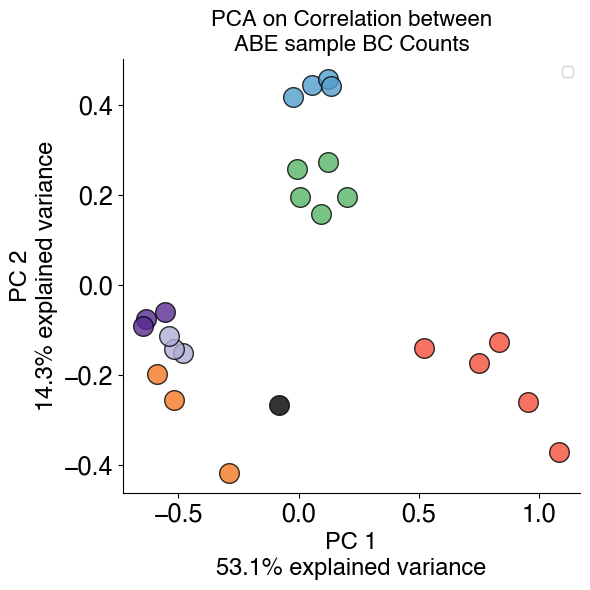

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(ABE_counts.corr(method='spearman'))
fig, ax = plt.subplots(figsize=(6,6))

blues = sns.color_palette('Blues')
greens = sns.color_palette('Greens')
reds = sns.color_palette('Reds')
yellows = sns.color_palette('Oranges')
purples = sns.color_palette('Purples')


blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = [blues[0], blues[2], blues[3], blues[5], greens[1], greens[2], greens[3], greens[4], greens[5],  reds[1], reds[2], reds[3], reds[4], reds[5],
           yellows[1], yellows[2], yellows[3], purples[0], purples[1], purples[2], purples[3], purples[4], purples[5], 'black']



palette = [blues[3], blues[3], blues[3], blues[3], greens[3], greens[3], greens[3], greens[3], greens[3],  reds[3], reds[3], reds[3], reds[3], reds[3],
           yellows[3], yellows[3], yellows[3], purples[2], purples[2], purples[2], purples[5], purples[5], purples[5], 'black']

for i in range(len(Xt)):
    ax.scatter(Xt[i][0], Xt[i][1], edgecolor='black', s=200, alpha=.8,c=palette[i]) #,label=list(ABE_counts.columns)[i])

ax.legend(loc='best')

var = pca.explained_variance_ratio_
print(var*100)
ax.set_xlabel(f'PC 1\n{np.round(var[0]*100, 1)}% explained variance', fontsize=17)
ax.set_ylabel(f'PC 2\n{np.round(var[1]*100, 1)}% explained variance', fontsize=17)
#ax.legend(bbox_to_anchor=(1.05, 1.))
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=18,)
ax.set_title('PCA on Correlation between\nABE sample BC Counts', fontsize=16)
fig.tight_layout()

# 2c

[36.03498449 11.14300231]


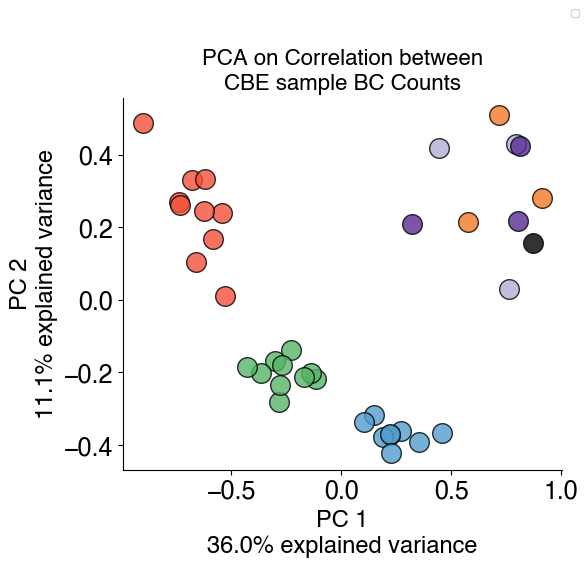

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(CBE_counts.corr(method='spearman'))
fig, ax = plt.subplots(figsize=(6,6))

blues = sns.color_palette('Blues')
greens = sns.color_palette('Greens')
reds = sns.color_palette('Reds')
yellows = sns.color_palette('Oranges')
purples = sns.color_palette('Purples')


blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = [blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], 
           greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3],
           reds[3], reds[3], reds[3], reds[3], reds[3], reds[3],reds[3], reds[3], reds[3], reds[3],
           yellows[3], yellows[3], yellows[3], 
           purples[2], purples[2], purples[2], purples[5], purples[5], purples[5], 
           'black']


for i in range(len(Xt)):
    ax.scatter(Xt[i][0], Xt[i][1], edgecolor='black', s=200, alpha=.8,c=palette[i]) #, label=list(CBE_counts.columns)[i])

ax.legend(loc='best')

var = pca.explained_variance_ratio_
print(var*100)
ax.set_xlabel(f'PC 1\n{np.round(var[0]*100, 1)}% explained variance', fontsize=17)
ax.set_ylabel(f'PC 2\n{np.round(var[1]*100, 1)}% explained variance', fontsize=17)
ax.legend(bbox_to_anchor=(1.05, 1.25), fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=18,)
ax.set_title('PCA on Correlation between\nCBE sample BC Counts', fontsize=16)
fig.tight_layout()

# 2d

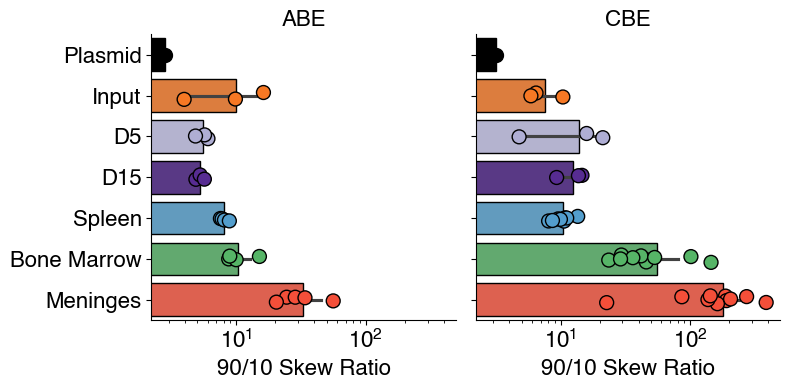

In [6]:
CBE_samps = list(CBE_counts.columns)
ABE_samps = list(ABE_counts.columns)

CBE_skew = []
ABE_skew = []
for i in CBE_samps:
    d = sorted(np.asarray(CBE_counts[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    CBE_skew.append(d[ninety]/d[ten])

for i in ABE_samps:
    d = sorted(np.asarray(ABE_counts[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    ABE_skew.append(d[ninety]/d[ten])

CBE_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [CBE_samps, CBE_skew])))
ABE_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [ABE_samps, ABE_skew])))

ax_dict_CBE = dict(zip(['spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5', 'spleen6',
       'spleen7', 'spleen8', 'spleen9', 'bonemarrow1', 'bonemarrow2',
       'bonemarrow3', 'bonemarrow4', 'bonemarrow5', 'bonemarrow6',
       'bonemarrow7', 'bonemarrow8', 'bonemarrow9', 'bonemarrow10',
       'meninges1', 'meninges2', 'meninges3', 'meninges4', 'meninges5',
       'meninges6', 'meninges7', 'meninges8', 'meninges9', 'meninges10',
       'input_rep1', 'input_rep2', 'input_rep3', 'd5_rep1', 'd5_rep2',
       'd5_rep3', 'd15_rep1', 'd15_rep2', 'd15_rep3', 'plasmidlib'], 
       [4,4,4,4,4,4,4,4,4,
        5,5,5,5,5,5,5,5,5,5,
        6,6,6,6,6,6,6,6,6,6,
        1,1,1,
        2,2,2,
        3,3,3,
        0]))

ax_dict_ABE = dict(zip(['spleen1', 'spleen2', 'spleen3', 'spleen4', 
          'bonemarrow1','bonemarrow2', 'bonemarrow3', 'bonemarrow4', 'bonemarrow5',
            'meninges1','meninges2', 'meninges3', 'meninges4', 'meninges5',
              'input_rep1', 'input_rep2', 'input_rep3',
                'd5_rep1', 'd5_rep2', 'd5_rep3', 
                'd15_rep1','d15_rep2', 'd15_rep3', 
                'plasmidlib'], 
       [4,4,4,4,
        5,5,5,5,5,
        6,6,6,6,6,
        1,1,1,
        2,2,2,
        3,3,3,
        0]))

d2 = dict(zip([0,1,2,3,4,5,6],['Plasmid', 'Input','D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']))

CBE_name = []
ABE_name = []
for i, val in CBE_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_CBE[s]
    s3 = d2[s2]
    CBE_name.append(s3)

for i, val in ABE_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_ABE[s]
    s3 = d2[s2]
    ABE_name.append(s3)

ABE_skew_df['Name'] = ABE_name
CBE_skew_df['Name'] = CBE_name


fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = ['black', yellows[3], purples[2], purples[5], blues[3], greens[3], reds[3]]
order=['Plasmid', 'Input', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = ABE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order)
sns.barplot(data = CBE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette,order=order)

sns.stripplot(data = ABE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
sns.stripplot(data = CBE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('ABE', fontsize=16)
ax[1].set_title('CBE', fontsize=16)
ax[0].set_xlabel('90/10 Skew Ratio', fontsize=16)
ax[1].set_xlabel('90/10 Skew Ratio', fontsize=16)

fig.tight_layout()

# 2e

In [7]:
MBES = pd.read_csv('MBESv2_CORRECTED.csv')
ABE = MBES[(MBES['Editor']=='ABE') & (MBES['classification']=='targeting guide')]
#CBE_non_leg = MBES[(MBES['Editor']=='CBE') & (MBES['legacy']==False) & (MBES['classification']=='targeting guide')]

CBE = MBES[(MBES['Editor']=='CBE') & (MBES['classification']=='targeting guide')]


ABE_raw = os.listdir('ABE_editing/raw')
CBE_raw = os.listdir('CBE_editing_UPDATED/raw')

#remove spleen 5 do to almost zero reads
ABE_raw.remove('spleen_rep5_ABE.csv')


#set filters for minimum number of sensor reads
min_sensor_reads = 10

t = []
corr = []
name = []

name_dict = {'meninges':'Meninges', 'spleen':'Spleen', 'bonemarrow':'Bone Marrow', 'd5':'D5', 'd15':'D15', 'plasmidlib':'Plasmid', 'input':'Input'}

for i in ABE_raw:
    g = pd.read_csv(f'ABE_editing/raw/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, ABE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
    name.append(name_dict[i.split('_')[0]])


t2 = []
corr2 = []
name2 = []

for i in CBE_raw:
    g = pd.read_csv(f'CBE_editing_UPDATED/raw/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t2.append(np.average(g2['target_base_edit_perc']))
    corr2.append(np.average(g2['corr_perc']))
    name2.append(name_dict[i.split('_')[0]])


CBE_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name2, t2,])))
CBE_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name2, corr2])))
CBE_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_editing2['Edit Type'] = 'Pure Correct Editing'
CBE_editing = pd.concat((CBE_editing1, CBE_editing2))


ABE_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
ABE_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
ABE_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
ABE_editing2['Edit Type'] = 'Pure Correct Editing'
ABE_editing = pd.concat((ABE_editing1, ABE_editing2))


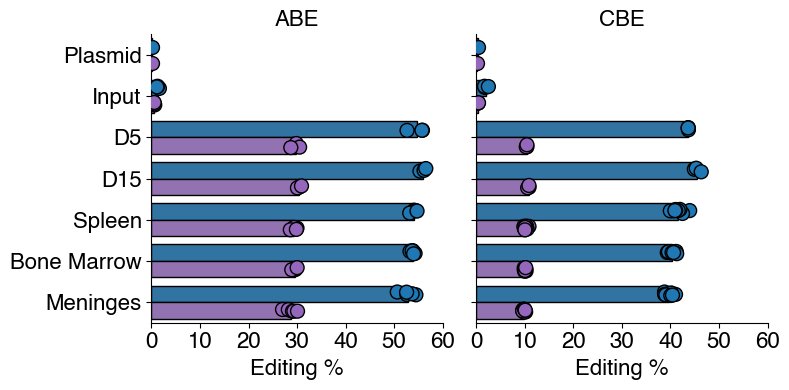

In [8]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

sns.barplot(data = ABE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order)
sns.barplot(data = CBE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order)#), legend=False)


sns.stripplot(data = ABE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order, dodge=True, s=10)
sns.stripplot(data = CBE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order, dodge=True, s=10)#), legend=False)

#sns.stripplot(data = ABE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
#sns.stripplot(data = CBE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xticks([0,10,20,30,40,50,60])
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('ABE', fontsize=16)
ax[1].set_title('CBE', fontsize=16)
ax[0].set_xlabel('Editing %', fontsize=16)
ax[1].set_xlabel('Editing %', fontsize=16)
ax[0].legend([],[], frameon=False)
ax[1].legend([],[], frameon=False)

fig.tight_layout()
#fig.savefig('figures/fig2e.pdf')


# 2f

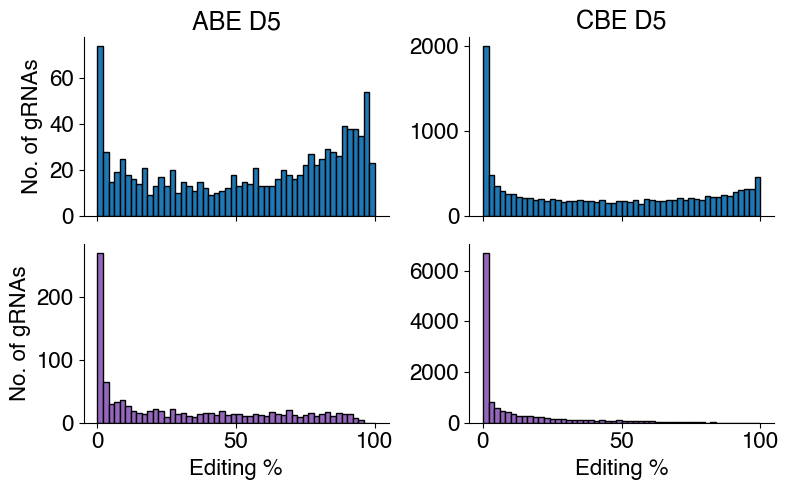

In [9]:
d5_ABE = pd.read_csv('ABE_editing/MLE/d5_ABE_MLE.csv').rename(columns = {'Guide_ID':'gRNA_id'})
d5_CBE = pd.read_csv('CBE_editing_UPDATED/MLE/d5_CBE_MLE.csv').rename(columns = {'Guide_ID':'gRNA_id'})

ABE = MBES[(MBES['Editor']=='ABE') & (MBES['classification']=='targeting guide')]
CBE_non_leg = MBES[(MBES['Editor']=='CBE') & (MBES['classification']=='targeting guide')]

ABE_edits = pd.merge(d5_ABE, ABE, on='gRNA_id')
CBE_edits = pd.merge(d5_CBE, CBE_non_leg, on='gRNA_id')

fig, ax = plt.subplots(2,2,figsize=(8,5), sharex=True, sharey=False)

ax[0][0].hist(ABE_edits['target_base_edit_perc'], bins=np.linspace(0,100,51), linewidth=1, color='tab:blue', edgecolor='black')
ax[1][0].hist(ABE_edits['corr_perc'], bins=np.linspace(0,100,51), linewidth=1, color='tab:purple', edgecolor='black')

ax[0][1].hist(CBE_edits['target_base_edit_perc'], bins=np.linspace(0,100,51), color='tab:blue', linewidth=1, edgecolor='black')
ax[1][1].hist(CBE_edits['corr_perc'], bins=np.linspace(0,100,51), linewidth=1, color='tab:purple', edgecolor='black')

ax[0][0].spines[['top', 'right']].set_visible(False)
ax[0][0].tick_params(axis='both', which='major', labelsize=16,)
ax[1][0].spines[['top', 'right']].set_visible(False)
ax[1][0].tick_params(axis='both', which='major', labelsize=16,)
ax[0][1].spines[['top', 'right']].set_visible(False)
ax[0][1].tick_params(axis='both', which='major', labelsize=16,)
ax[1][1].spines[['top', 'right']].set_visible(False)
ax[1][1].tick_params(axis='both', which='major', labelsize=16,)
ax[0][0].set_ylabel('No. of gRNAs', fontsize=16)
ax[1][0].set_ylabel('No. of gRNAs', fontsize=16)
ax[1][1].set_xlabel('Editing %', fontsize=16)
ax[1][0].set_xlabel('Editing %', fontsize=16)

ax[0][0].set_title('ABE D5', fontsize=18)
ax[0][1].set_title('CBE D5', fontsize=18)

fig.tight_layout()
#fig.savefig('figures/fig2f.pdf')

# 2g

In [10]:
cosmic = pd.read_csv('source_data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

#MBES = pd.read_csv('MBESv2_CORRECTED.csv')
cc1 = pd.read_csv('master_table_min50_control_mean_invitro.csv')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in cc1.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

cc1['Role in Cancer']=gene_type

In Vitro D15
1 Daxx N274S tab:purple
2 Syk N451S tab:red
3 Ret K809E tab:red
4 Erbb3 Q807R tab:red
5 Raf1 R391G tab:red
784 Trp53 C138R tab:purple
785 Ctcf C384R tab:blue
786 Ctnnb1 T41A tab:red
787 Map2k1 F53L tab:red
788 Vhl N44S tab:blue
Spleen
1 Ercc2 T484A tab:blue
2 Ctnnb1 S45P tab:red
3 Nfe2 Q286R tab:grey
4 Syk N451S tab:red
5 Raf1 R391G tab:red
784 Ctnnb1 D32G tab:red
785 Arid1a D1051G tab:blue
786 Fbxw7 W428R tab:blue
787 Ctnnb1 T41A tab:red
788 Vhl N44S tab:blue
Bone
1 Syk N451S tab:red
2 Arid5b K1026E tab:grey
3 Keap1 H311R tab:blue
4 Ret K809E tab:red
5 Smo I160V tab:red
784 Fbxw7 W428R tab:blue
785 Ctnnb1 T41A tab:red
786 Vhl N44S tab:blue
787 Rhoa L57S tab:purple
788 Arid1a D1051G tab:blue
Meninges
1 Daxx N274S tab:purple
2 Raf1 S259P tab:red
3 Foxa1 Y259C tab:red
4 Keap1 Y33H tab:blue
5 Keap1 Y33H tab:blue
784 Kmt2d K4845R tab:purple
785 Rb1 D597G tab:blue
786 Crebbp Y1504H tab:purple
787 Ctcf C384R tab:blue
788 Arid1a D1051G tab:blue


Text(0.5, 1.0, 'Meninges')

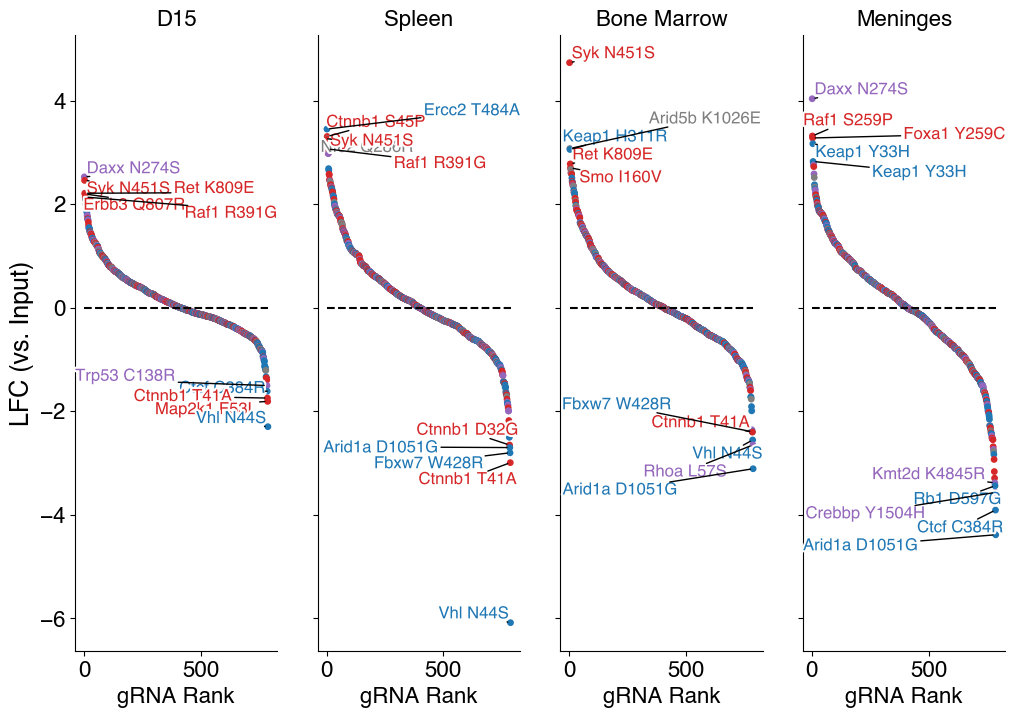

In [11]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20
CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]


#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{b} {a}')


        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')
    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)
#fig.savefig('figures/2g.png', dpi=300)

# 2h

In [12]:
cosmic = pd.read_csv('source_data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

#MBES = pd.read_csv('MBESv2_CORRECTED.csv')
cc1 = pd.read_csv('master_table_min50_control_mean_invitro.csv')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in cc1.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

cc1['Role in Cancer']=gene_type

In Vitro D15
1 Kmt2b R2717C tab:grey
2 Tcf7l2 P392S tab:red
3 Rab35 R69H tab:grey
4 Gata2 P175L tab:red
5 Foxp1 R465H tab:red
8282 Apc D1031N tab:blue
8283 Zfhx3 G921E tab:blue
8284 Amer1 R885Q tab:blue
8285 Ptprs R845H tab:grey
8286 Grin2a P1366S tab:blue
Spleen
1 Flt4 p.G1154R (human) tab:red
2 Tek R167W tab:grey
3 Gnas R1004C tab:red
4 Zfhx3 A3330T tab:blue
5 Brd4 E1160K tab:red
8282 Smarca4 R1385* tab:blue
8283 Top1 P610L tab:grey
8284 Dnmt3a P800L tab:blue
8285 Smarca4 A945T tab:blue
8286 Sesn2 R95C tab:grey
Bone
1 Tek R167W tab:grey
2 Apc Q976* tab:blue
3 Palb2 Q962* tab:blue
4 Zfhx3 R3006W tab:blue
5 Zfhx3 R60H tab:blue
8282 Syk R584W tab:red
8283 Smarca4 R978Q tab:blue
8284 Arid2 S297F tab:blue
8285 Smarca4 R1385* tab:blue
8286 Smarca4 A945T tab:blue
Meninges
1 Ptprt E1324K tab:blue
2 Gata3 R275W tab:purple
3 Axl G833E tab:grey
4 Cdk12 Q598* tab:blue
5 Prdm14 P413L tab:grey
8282 Hist1h3a p.A47V (human) tab:grey
8283 Ptprs A416V tab:grey
8284 Kdm5a R145H tab:red
8285 Insr D569N 

Text(0.5, 1.0, 'Meninges')

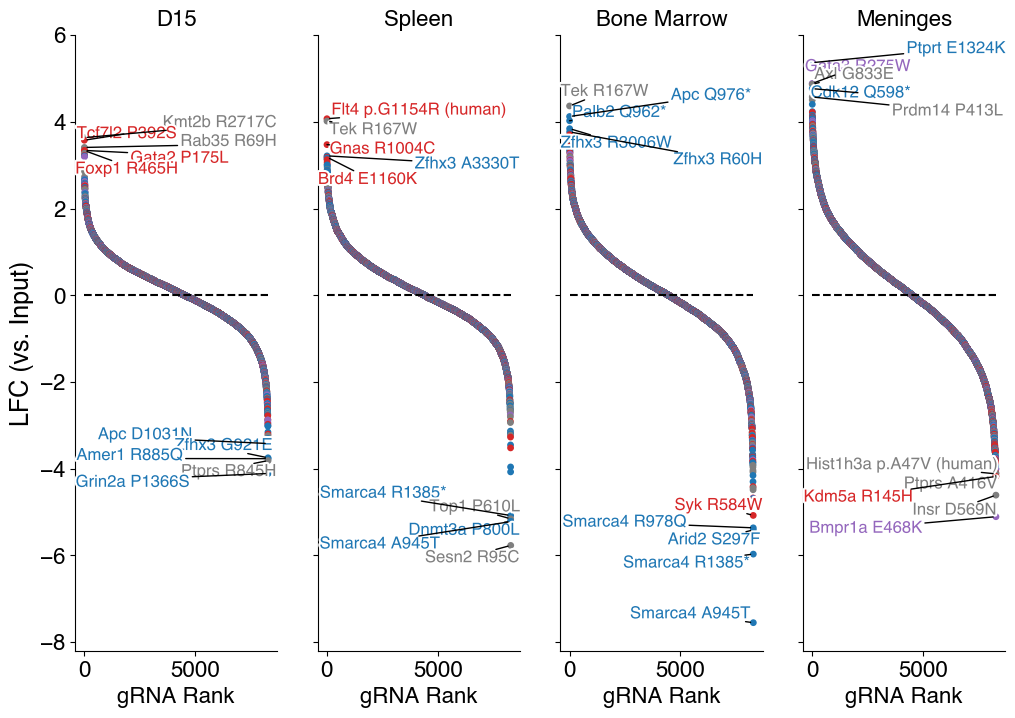

In [13]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20

CBE_targ = cc1[(cc1['Editor']=='CBE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]
ABE_targ = cc1[(cc1['Editor']=='ABE') & (cc1['classification']=='targeting guide')& (cc1['target_base_edit_perc']>=min_edit)]

#-----and plotting--------
names2 = ['In Vitro D15','Spleen', 'Bone', 'Meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_{val}'],color=cc2['color'], s=15)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m']
        t.append(f'{b} {a}')

        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

#fig.savefig('figures/2h.png', dpi=300)

# 2i

Looking at genes with biggest range of gRNA LFC (for highly represented genes)


In [14]:
master = pd.read_csv('master_table_min50_control_mean_invitro.csv')


#put editing efficiency cutoff here
master_targ = master[(master['classification']=='targeting guide') & (master['target_base_edit_perc']>=20)]

u, c= np.unique(master_targ['gene_name_m'], return_counts=True)
dd = pd.DataFrame(dict(zip(['gene', 'count'], [u,c]))).sort_values(by='count', ascending=False)

#num_hits = 100
#topx = dd[:num_hits]

count_cutoff = 30
topx = dd[dd['count']>=count_cutoff]
subset = master_targ[master_targ['gene_name_m'].isin(list(topx['gene']))]


tissues = ['In Vitro D15', 'Spleen', 'Bone', 'Meninges']


for tissue in tissues:

    ranges = []
    for i in list(topx['gene']):
        sub2 =list(subset[subset['gene_name_m']==i][f'Z_{tissue}'])
        range1 = max(sub2)-min(sub2)
        ranges.append(range1)
    
    topx[f'range_{tissue}'] = ranges
    #topx = topx.sort_values(by='range',ascending=False)

#fig, ax = plt.subplots(figsize=(5,15))

#sns.boxplot(data=subset, y='gene_name_m', x=f'LFC_{tissue}', order=list(topx[:num_hits]['gene']))
#ax.set_title(f'{tissue} |  target base editing ≥ 20%', fontsize=14)

In [15]:
iv_genes = list(topx.sort_values(by='range_In Vitro D15', ascending=False)[:2]['gene'])
spleen_genes = list(topx.sort_values(by='range_Spleen', ascending=False)[:2]['gene'])
spleen_genes2 = list(topx.sort_values(by='range_Spleen', ascending=False)[2:4]['gene'])

bone_genes = list(topx.sort_values(by='range_Bone', ascending=False)[:2]['gene'])
bone_genes2 = list(topx.sort_values(by='range_Bone', ascending=False)[2:4]['gene'])

men_genes =  list(topx.sort_values(by='range_Meninges', ascending=False)[:2]['gene'])
men_genes2 =  list(topx.sort_values(by='range_Meninges', ascending=False)[2:4]['gene'])

combined_genes = [iv_genes, spleen_genes, spleen_genes2, bone_genes, bone_genes2, men_genes, men_genes2]
combined_genes

[['Grin2a', 'Ptprs'],
 ['Smarca4', 'Dnmt3a'],
 ['Ikzf1', 'Atm'],
 ['Smarca4', 'Apc'],
 ['Arid2', 'Ntrk3'],
 ['Arid1a', 'Ptprt'],
 ['Crebbp', 'Kmt2b']]

112
89
136
80
50
44
136
63
48
54
144
153
83
98


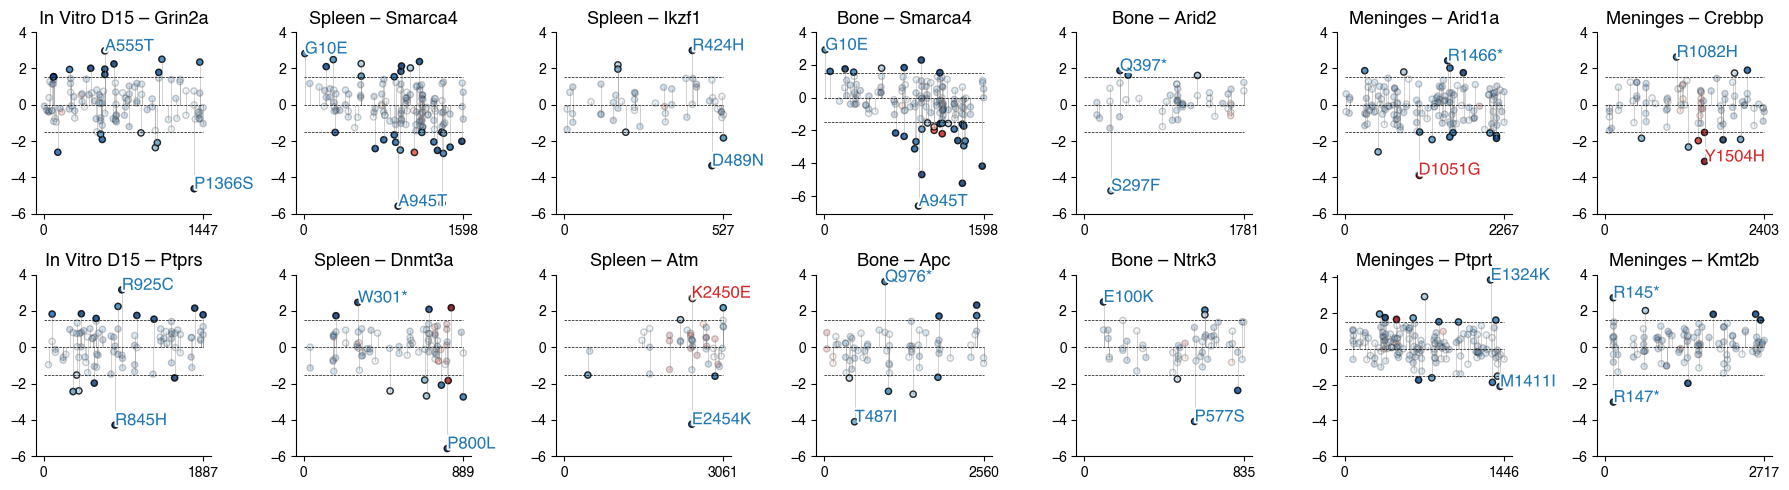

In [16]:

#for idx, gene in enumerate(top_genes[:5]):
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

#gene = 'Smarca4'

#genes = ['Kmt2d', 'Arid1a', 'Ptprt', 'Smarca4', 'Trp53']

fig, ax = plt.subplots(2,7,figsize=(18,5), sharey=False) #sharey='col',)


tissues = ['In Vitro D15', 'Spleen', 'Spleen', 'Bone', 'Bone', 'Meninges', 'Meninges']


for idx, tissue in enumerate(tissues):

    #ptprt = cc1[(cc1['gene_name_m']==gene) & (cc1['legacy']==False) & (cc1['classification_h'].isin(['Missense', 'Nonsense'])) & (cc1['target_base_edit_perc']>=20)]
    for kk, val in enumerate(combined_genes[idx]):


        ptprt = master_targ[(master_targ['gene_name_m']==val) & (master_targ['classification_h'].isin(['Missense', 'Nonsense']))]

        ptprt['codon'] = [int(i[1:-1]) for i in ptprt['HGVSp_m']]

        samples = ['Z_In Vitro D15', 'Z_Spleen', 'Z_Bone', 'Z_Meninges']
        samp_dict = dict(zip(samples, ['In Vitro', 'Spleen', 'Bone', 'Meninges']))

        for jj, val3 in ptprt.iterrows():
            x = val3['codon']
            y = val3[f'Z_{tissue}']


            ax[kk][idx].plot([x,x],[0,y], color='tab:gray', linewidth=0.5, alpha=.5)

        ptprt1 = ptprt[ptprt['Editor']=='ABE']
        ptprt2 = ptprt[ptprt['Editor']=='CBE']

        print(len(ptprt))
        #marker_sizes1 = 5*(-np.log10(np.asarray(sorted(ptprt1[f'FDR_{val2[4:]}']))+1e-10))**2 + 20
        #marker_sizes2 = 5*(-np.log10(np.asarray(sorted(ptprt2[f'FDR_{val2[4:]}']))+1e-10))**2 + 20
        val2 = f'Z_{tissue}'

        ptprt1_1 = ptprt1[(ptprt1[val2]<=1.5) | (ptprt1[val2]>=-1.5)]
        ptprt1_2 = ptprt1[(ptprt1[val2]>=1.5) | (ptprt1[val2]<=-1.5)]
        ptprt2_1 = ptprt2[(ptprt2[val2]<=1.5) | (ptprt2[val2]>=-1.5)]
        ptprt2_2 = ptprt2[(ptprt2[val2]>=1.5) | (ptprt2[val2]<=-1.5)]

        #ptprt1_1 = ptprt1[(ptprt1[val2]<=1.5)] 
        #ptprt1_2 = ptprt1[(ptprt1[val2]>=1.5)] 
        #ptprt2_1 = ptprt2[(ptprt2[val2]<=1.5)] 
        #ptprt2_2 = ptprt2[(ptprt2[val2]>=1.5)]

        ax[kk][idx].scatter(ptprt1_1['codon'], ptprt1_1[val2], c=ptprt1_1['target_base_edit_perc'], cmap='Reds', s=20, vmin=0, vmax=100, edgecolor='black', linewidth=1, alpha=.2)
        ax[kk][idx].scatter(ptprt1_2['codon'], ptprt1_2[val2], c=ptprt1_2['target_base_edit_perc'], cmap='Reds', s=20, vmin=0, vmax=100, edgecolor='black', linewidth=1, alpha=.8)



        ax[kk][idx].scatter(ptprt2_1['codon'], ptprt2_1[val2], c=ptprt2_1['target_base_edit_perc'], cmap='Blues', s=20, vmin=0, vmax=100, edgecolor='black', linewidth=1, alpha=.2)
        ax[kk][idx].scatter(ptprt2_2['codon'], ptprt2_2[val2], c=ptprt2_2['target_base_edit_perc'], cmap='Blues', s=20, vmin=0, vmax=100, edgecolor='black', linewidth=1, alpha=.8)

        #and annotate top 2 and bototm 2 variants
        #and annotate top and bottom 5 variant
        tops = pd.concat((ptprt1_2, ptprt2_2)).sort_values(by=val2, ascending=False)[:1]
        bottoms = pd.concat((ptprt1_2, ptprt2_2)).sort_values(by=val2, ascending=True)[:1]
        tb = pd.concat((tops, bottoms))

        t = []
        x = []
        y = []
        c = []

        c_dict2 = {'ABE':'tab:red', 'CBE':'tab:blue'}
        for i, val3 in tb.iterrows():
            y.append(val3[val2])
            x.append(val3['codon'])
            c.append(c_dict2[val3['Editor']])
            a = val3['HGVSp_m']
    
            t.append(a)
            
        texts = [ax[kk][idx].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

        #adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[kk][idx], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))



        #ax[kk].legend(*sc.legend_elements("sizes", num=6))
        #ax[kk].set_title(samp_dict[val2], fontsize=14)

        if kk==3:
            ax[kk][idx].spines[['top', 'right']].set_visible(False)
        else:
            ax[kk][idx].spines[['top', 'right',]].set_visible(False)
            ax[kk][idx].set_xticks([0, max(ptprt['codon'])])


        ax[kk][idx].tick_params(axis='both', which='major', labelsize=10,)
        ax[kk][idx].plot([0, max(ptprt['codon'])], [0,0], linestyle='dashed', color='black',linewidth=.5)
        ax[kk][idx].plot([0, max(ptprt['codon'])], [1.5,1.5], linestyle='dashed', color='black',linewidth=.5)
        ax[kk][idx].plot([0, max(ptprt['codon'])], [-1.5,-1.5], linestyle='dashed', color='black',linewidth=.5)

        ax[kk][idx].set_yticks([-6,-4,-2,0,2,4])

        #ax[0][idx].set_title(f'{tissue}', fontsize=16)
        ax[kk][idx].set_title(f'{tissue} – {val}', fontsize=13)
        #ax[0][idx].set_ylim(-5,5)
        ax[kk][idx].patch.set_facecolor('None')

fig.tight_layout()
#fig.savefig('figures/lollipop_fig2.png', dpi=300)

# New Visualizations

In [10]:
ABE_LFC_FDR = pd.read_csv('ABE_LFC_FDR_df.csv')
CBE_LFC_FDR = pd.read_csv('CBE_LFC_FDR_df.csv')


cosmic = pd.read_csv('source_data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in ABE_LFC_FDR.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

ABE_LFC_FDR['Role in Cancer']=gene_type

gene_type = []
for i, val in CBE_LFC_FDR.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

CBE_LFC_FDR['Role in Cancer']=gene_type


d15
1 Ptprt E1033K tab:blue
2 Kmt2b R2717C tab:grey
3 Dnmt3a P800L tab:blue
4 Tcf7l2 P392S tab:red
5 Gata2 P175L tab:red
8295 Apc D1031N tab:blue
8296 Zfhx3 G921E tab:blue
8297 Amer1 R885Q tab:blue
8298 Ptprs R845H tab:grey
8299 Grin2a P1366S tab:blue
spleen
1 Tek R167W tab:grey
2 Flt4 p.G1154R (human) tab:red
3 Ptprt E1033K tab:blue
4 Zfhx3 A3330T tab:blue
5 Gnas R1004C tab:red
8295 Smarca4 R1385* tab:blue
8296 Dnmt3a P800L tab:blue
8297 Smarca4 A945T tab:blue
8298 Top1 P610L tab:grey
8299 Sesn2 R95C tab:grey
bonemarrow
1 Ptprt E1033K tab:blue
2 Tek R167W tab:grey
3 Apc Q976* tab:blue
4 Palb2 Q962* tab:blue
5 Keap1 A95T tab:blue
8295 Syk R584W tab:red
8296 Smarca4 R978Q tab:blue
8297 Smarca4 R1385* tab:blue
8298 Arid2 S297F tab:blue
8299 Smarca4 A945T tab:blue
meninges
1 Ptprt E1033K tab:blue
2 Rad50 R352C tab:blue
3 Ptprt E1324K tab:blue
4 Cdk12 Q598* tab:blue
5 Axl G833E tab:grey
8295 Fgfr3 R567W tab:red
8296 Ercc5 A791V tab:blue
8297 Kmt2b R147* tab:grey
8298 Hist1h3g p.D107N (huma

Text(0.5, 1.0, 'Meninges')

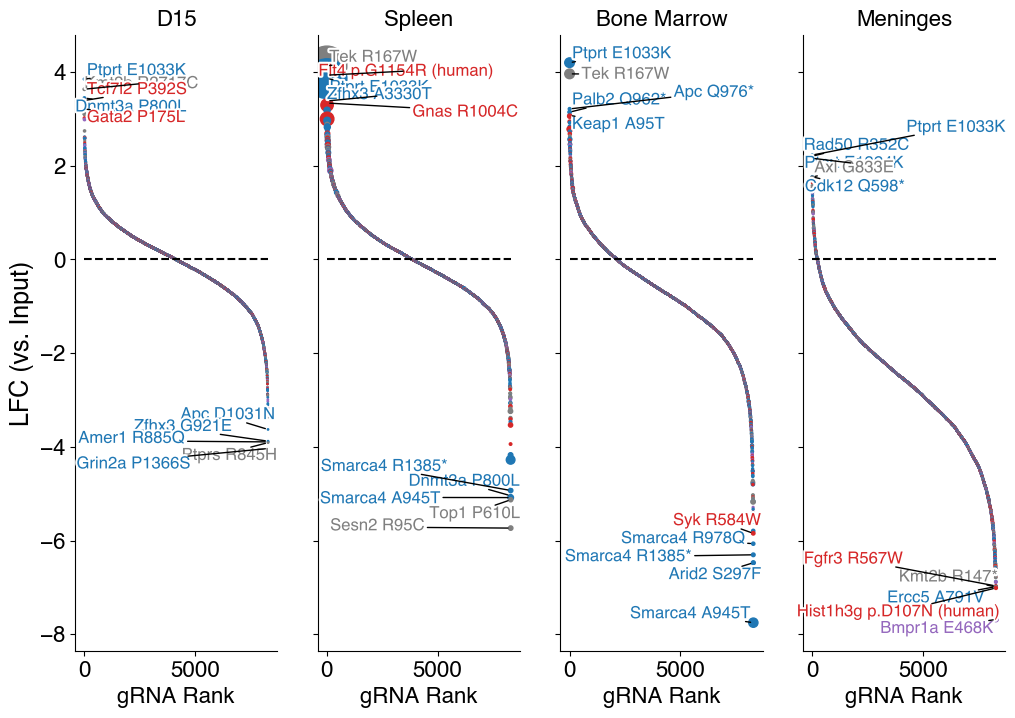

In [21]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20

CBE_targ = CBE_LFC_FDR[(CBE_LFC_FDR['classification']=='targeting guide')& (CBE_LFC_FDR['target_base_edit_perc']>=min_edit)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]


    sizes = 2**(-np.log10(cc2[f'FDR_{val}']))

    ax[k].scatter(cc2['Rank'], cc2[f'LFC_median_{val}'],color=cc2['color'], s=sizes)

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

d15
1 Pik3r3 D11G tab:grey
2 Daxx N274S tab:purple
3 Syk N451S tab:red
4 Raf1 R391G tab:red
5 Myc T73A tab:red
791 Ctcf C384R tab:blue
792 Map2k1 F53L tab:red
793 Ctnnb1 T41A tab:red
794 Ezh2 Non-coding tab:purple
795 Vhl N44S tab:blue
spleen
1 Ctnnb1 S45P tab:red
2 Ercc2 T484A tab:blue
3 Nfe2 Q286R tab:grey
4 Ep300 H350R tab:blue
5 Syk N451S tab:red
791 Ctnnb1 D32G tab:red
792 Fbxw7 W428R tab:blue
793 Arid1a D1051G tab:blue
794 Ctnnb1 T41A tab:red
795 Vhl N44S tab:blue
bonemarrow
1 Syk N451S tab:red
2 Ep300 H350R tab:blue
3 Arid5b K1026E tab:grey
4 Keap1 H311R tab:blue
5 Myd88 M219T tab:red
791 Crebbp Y1504H tab:purple
792 Ctnnb1 T41A tab:red
793 Rhoa L57S tab:purple
794 Vhl N44S tab:blue
795 Arid1a D1051G tab:blue
meninges
1 Daxx N274S tab:purple
2 Keap1 Y33H tab:blue
3 Raf1 S259P tab:red
4 Ep300 H350R tab:blue
5 Foxa1 Y259C tab:red
791 Crebbp Y1504H tab:purple
792 Kmt2d K4845R tab:purple
793 Rb1 D597G tab:blue
794 Ctcf C384R tab:blue
795 Arid1a D1051G tab:blue


Text(0.5, 1.0, 'Meninges')

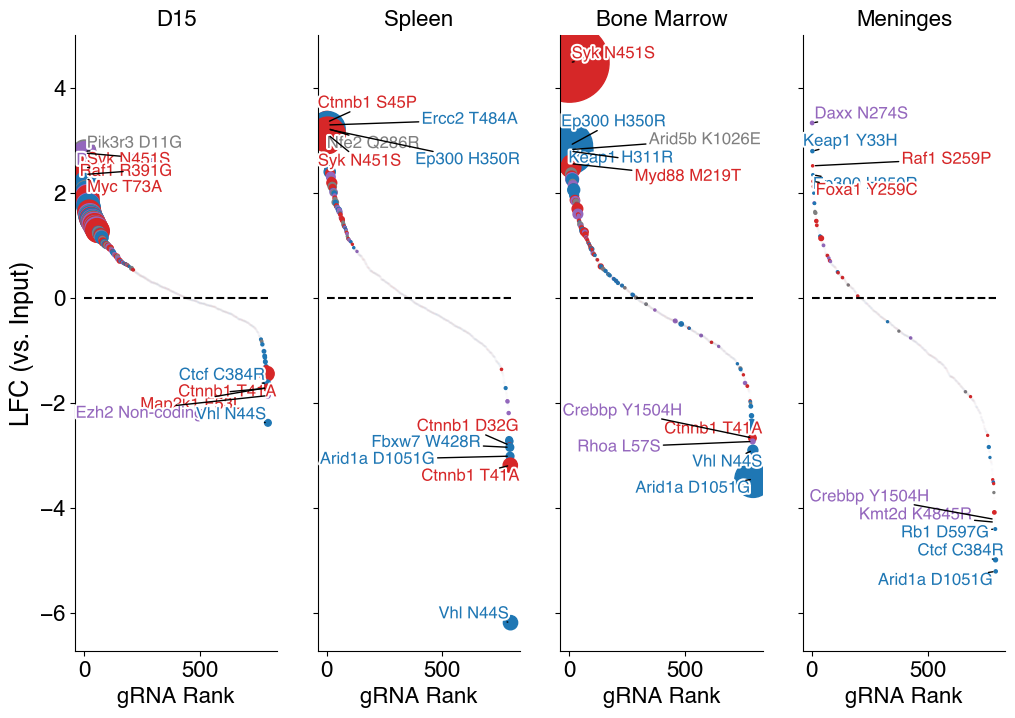

In [34]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20
FDR_cutoff = .1

ABE_targ = ABE_LFC_FDR[(ABE_LFC_FDR['classification']=='targeting guide')& (ABE_LFC_FDR['target_base_edit_perc']>=min_edit)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by sig level
    cc2_sig = cc2[cc2[f'FDR_{val}']<FDR_cutoff]
    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]

    sizes = 2**(-np.log10(cc2_sig[f'FDR_{val}']))
    sizes2 = 2**(-np.log10(cc2_other[f'FDR_{val}']))

    ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=sizes)
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'],color=cc2_other['color'], s=sizes2, alpha=.01)


    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

In [ ]:
cc2.sort_values(by='LFC_median_spleen', ascending=False)['Input_']

,gRNA_id,Gene,spleen1,spleen2,spleen3,spleen4,LFC_avg_spleen,LFC_median_spleen,Input_median,bonemarrow1,...,FDR_low_bonemarrow,FDR_bonemarrow,p_high_unadjusted_meninges,p_low_unadjusted_meninges,FDR_high_meninges,FDR_low_meninges,FDR_meninges,Role in Cancer,Rank,color
1027,gRNA_13007,Vhl,-5.522186,-7.954741,-6.852688,-1.850604,-5.545055,-6.187437,235.136502,-3.947124,...,2.068601e-06,2.068601e-06,9.993494e-01,0.000028,1.000000,0.007599,0.007599,TSG,765,tab:blue
226,gRNA_2494,Ctnnb1,-2.238856,-3.021354,-3.591726,-3.351482,-3.050854,-3.186418,784.914902,-3.426294,...,1.298701e-05,1.298701e-05,9.999959e-01,0.000005,1.000000,0.002666,0.002666,Oncogene,789,tab:red
25,gRNA_671,Arid1a,-3.481979,-1.666607,-2.543993,-4.467769,-3.040087,-3.012986,628.853436,-3.886356,...,3.696671e-10,3.696671e-10,9.999999e-01,0.000012,1.000000,0.004426,0.004426,TSG,795,tab:blue
407,gRNA_4141,Fbxw7,-2.148976,-2.545553,-3.408396,-3.144226,-2.811788,-2.844889,1123.279978,-1.771718,...,1.438689e-05,1.438689e-05,9.986041e-01,0.021737,1.000000,0.396214,0.396214,TSG,743,tab:blue
221,gRNA_2458,Ctnnb1,-2.974894,-1.523964,-3.519522,-2.639341,-2.664430,-2.807117,583.279661,-2.685562,...,7.592610e-02,7.592610e-02,9.900557e-01,0.096979,1.000000,0.648549,0.648549,Oncogene,720,tab:red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,gRNA_12164,Syk,3.314257,2.919457,2.704232,4.148897,3.271711,3.116857,135.796817,2.808886,...,1.000000e+00,2.190205e-12,3.094875e-07,0.999948,0.000331,0.999974,0.000331,Oncogene,40,tab:red
299,gRNA_3084,Ep300,3.127945,3.297796,3.894166,3.144012,3.365980,3.220904,40.092394,3.379415,...,1.000000e+00,8.609387e-11,5.335775e-04,0.989269,0.035389,0.999974,0.035389,TSG,4,tab:blue
633,gRNA_7812,Nfe2,1.610985,3.106768,3.362326,3.386149,2.866557,3.234547,190.115544,0.972658,...,1.000000e+00,1.792594e-01,2.851455e-03,0.498489,0.091390,0.999974,0.091390,Undefined,376,tab:grey
365,gRNA_3703,Ercc2,3.539324,3.060965,4.081923,1.003506,2.921429,3.300144,126.743696,3.290858,...,1.000000e+00,4.441119e-05,1.799354e-01,0.626736,0.798998,0.999974,0.798998,TSG,473,tab:blue


In [50]:
values = [.1, .01, .005, .015, .0001, .5, .98, .0025, 0.00001]
bins = [.0001, .001, .01, .1]  # ascending order


def bin_maker(values):
    # Add -inf and inf for underflow and overflow bins
    extended_bins = [float('-inf')] + bins + [float('inf')]

    # Use digitize with right=False for exclusive upper bound
    indices = np.digitize(values, extended_bins, right=False)

    # Create human-readable bin labels with exclusive upper bound
    labels = []
    for i in indices:
        low = extended_bins[i - 1]
        high = extended_bins[i]

        if low == float('-inf'):
            label = f"< {high}"
        elif high == float('inf'):
            label = f"≥ {low}"
        else:
            label = f"{low} – <{high}"

        labels.append(label)

    return labels

ls_dict = {'≥ 0.1' : 1,
 '0.01 – <0.1' : 10,
 '0.001 – <0.01': 40,
 '0.0001 – <0.001': 80,
 '< 0.0001': 160}

d15
1 Pik3r3 D11G tab:grey
2 Daxx N274S tab:purple
3 Syk N451S tab:red
4 Raf1 R391G tab:red
5 Myc T73A tab:red
791 Ctcf C384R tab:blue
792 Map2k1 F53L tab:red
793 Ctnnb1 T41A tab:red
794 Ezh2 Non-coding tab:purple
795 Vhl N44S tab:blue
spleen
1 Ctnnb1 S45P tab:red
2 Ercc2 T484A tab:blue
3 Nfe2 Q286R tab:grey
4 Ep300 H350R tab:blue
5 Syk N451S tab:red
791 Ctnnb1 D32G tab:red
792 Fbxw7 W428R tab:blue
793 Arid1a D1051G tab:blue
794 Ctnnb1 T41A tab:red
795 Vhl N44S tab:blue
bonemarrow
1 Syk N451S tab:red
2 Ep300 H350R tab:blue
3 Arid5b K1026E tab:grey
4 Keap1 H311R tab:blue
5 Myd88 M219T tab:red
791 Crebbp Y1504H tab:purple
792 Ctnnb1 T41A tab:red
793 Rhoa L57S tab:purple
794 Vhl N44S tab:blue
795 Arid1a D1051G tab:blue
meninges
1 Daxx N274S tab:purple
2 Keap1 Y33H tab:blue
3 Raf1 S259P tab:red
4 Ep300 H350R tab:blue
5 Foxa1 Y259C tab:red
791 Crebbp Y1504H tab:purple
792 Kmt2d K4845R tab:purple
793 Rb1 D597G tab:blue
794 Ctcf C384R tab:blue
795 Arid1a D1051G tab:blue


Text(0.5, 1.0, 'Meninges')

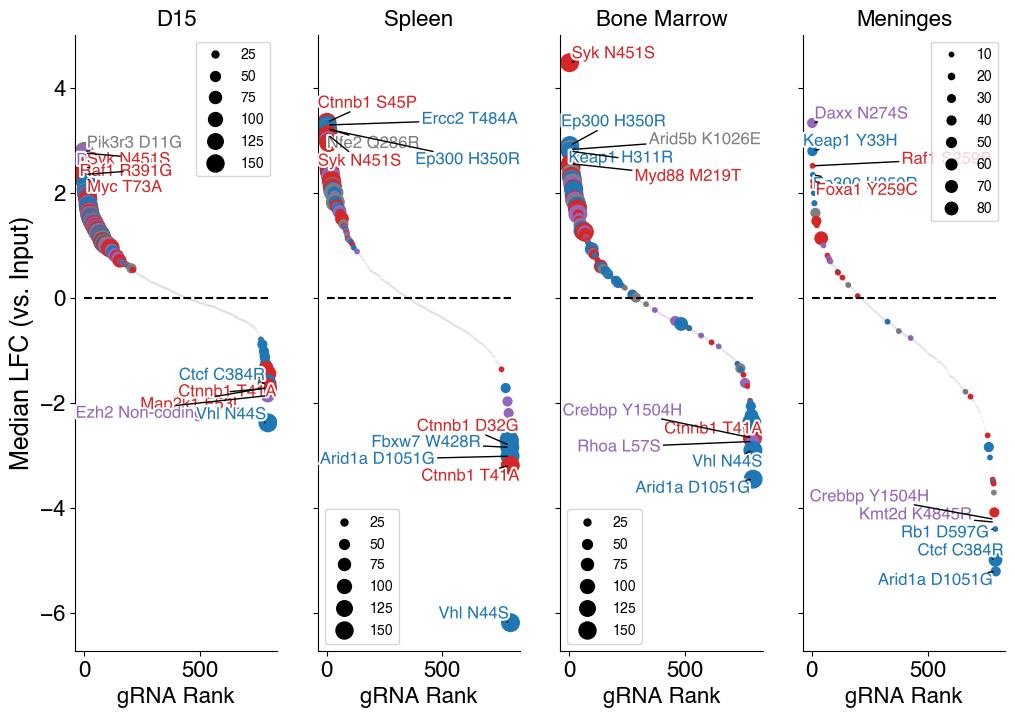

In [ ]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20
FDR_cutoff = .1

ABE_targ = ABE_LFC_FDR[(ABE_LFC_FDR['classification']=='targeting guide')& (ABE_LFC_FDR['target_base_edit_perc']>=min_edit)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by sig level
    cc2_sig = cc2[cc2[f'FDR_{val}']<FDR_cutoff]
    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]

    b1 = bin_maker(np.asarray(cc2_sig[f'FDR_{val}']))
    b2 = bin_maker(np.asarray(cc2_other[f'FDR_{val}']))
  
    sizes1 = [ls_dict[i] for i in b1]
    sizes2 =  [ls_dict[i] for i in b2]

    sc = ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=sizes1)
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'],color=cc2_other['color'], s=sizes2, alpha=.01)


    ax[k].legend(*sc.legend_elements("sizes", num=6))

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

d15
1 Pik3r3 D11G tab:grey
2 Daxx N274S tab:purple
3 Syk N451S tab:red
4 Raf1 R391G tab:red
5 Myc T73A tab:red
790 Ctnnb1 S45P tab:red
791 Ctcf C384R tab:blue
792 Map2k1 F53L tab:red
793 Ctnnb1 T41A tab:red
794 Vhl N44S tab:blue
spleen
1 Ctnnb1 S45P tab:red
2 Ercc2 T484A tab:blue
3 Nfe2 Q286R tab:grey
4 Ep300 H350R tab:blue
5 Syk N451S tab:red
790 Ctnnb1 D32G tab:red
791 Fbxw7 W428R tab:blue
792 Arid1a D1051G tab:blue
793 Ctnnb1 T41A tab:red
794 Vhl N44S tab:blue
bonemarrow
1 Syk N451S tab:red
2 Ep300 H350R tab:blue
3 Arid5b K1026E tab:grey
4 Keap1 H311R tab:blue
5 Myd88 M219T tab:red
790 Crebbp Y1504H tab:purple
791 Ctnnb1 T41A tab:red
792 Rhoa L57S tab:purple
793 Vhl N44S tab:blue
794 Arid1a D1051G tab:blue
meninges
1 Daxx N274S tab:purple
2 Keap1 Y33H tab:blue
3 Raf1 S259P tab:red
4 Ep300 H350R tab:blue
5 Foxa1 Y259C tab:red
790 Crebbp Y1504H tab:purple
791 Kmt2d K4845R tab:purple
792 Rb1 D597G tab:blue
793 Ctcf C384R tab:blue
794 Arid1a D1051G tab:blue


Text(0.5, 1.0, 'Meninges')

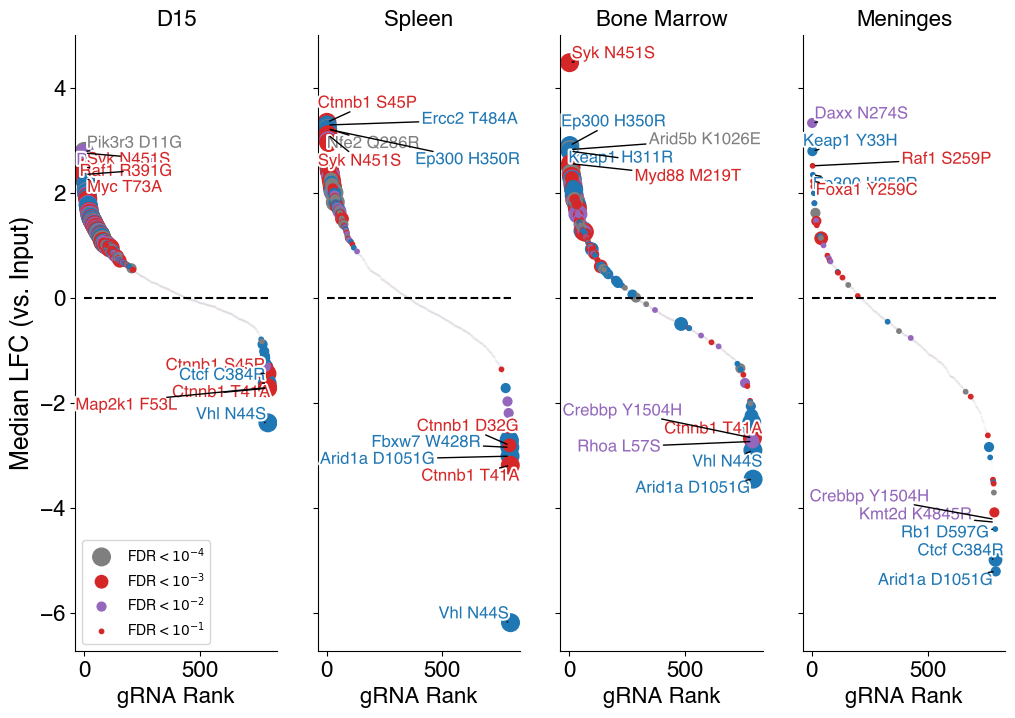

In [69]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20
FDR_cutoff = .1
min_input_counts = 2

ABE_targ = ABE_LFC_FDR[(ABE_LFC_FDR['classification']=='targeting guide')& (ABE_LFC_FDR['target_base_edit_perc']>=min_edit) & (ABE_LFC_FDR['Input_median']>=20)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by significance level

    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'], color=cc2_other['color'], s=1, alpha=.01)

    FDR_cutoffs = [10**-4, 10**-3, 10**-2, 10**-1]

    size_dict = dict(zip(FDR_cutoffs, [160,80,40,10]))
    label_dict = dict(zip(FDR_cutoffs, ['FDR < $10^{-4}$', 'FDR < $10^{-3}$', 'FDR < $10^{-2}$', 'FDR < $10^{-1}$']))

    for id1, cut in enumerate(FDR_cutoffs):
        if id1==0:
            cc2_sig = cc2[cc2[f'FDR_{val}']<cut]
            
        else:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) & (cc2[f'FDR_{val}']>=FDR_cutoffs[id1-1])]

        ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut])

    if k==0:
        ax[k].legend()

    #------making plot pretty------

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

d15
1 Kmt2b R2717C tab:grey
2 Foxp1 R465H tab:red
3 Fgf3 M190I tab:grey
4 Carm1 R337W tab:grey
5 Kmt2d Q3632* tab:purple
7705 Pim1 E30K tab:red
7706 Tsc2 A1195V tab:blue
7707 Hist1h3g p.D107N (human) tab:red
7708 Apc D1031N tab:blue
7709 Zfhx3 G921E tab:blue
spleen
1 Brd4 E1160K tab:red
2 Keap1 R413C tab:blue
3 Card11 R967C tab:red
4 Fat1 S3959L tab:blue
5 Calr S195F tab:red
7705 Myod1 R120H tab:red
7706 Med12 R1497C tab:blue
7707 Pim1 E246K tab:red
7708 Atm E2454K tab:blue
7709 Ikzf1 p.R208* (human) tab:blue
bonemarrow
1 Brd4 E1160K tab:red
2 Rras2 G23S tab:red
3 Map3k1 Q543* tab:purple
4 Ptprt G372E tab:blue
5 Lats1 R501C tab:blue
7705 Smarca4 R1584W tab:blue
7706 Fgfr2 D323N tab:red
7707 Smarcb1 R53* tab:blue
7708 Syk R584W tab:red
7709 Arid2 S297F tab:blue
meninges
1 Cdk12 Q598* tab:blue
2 Axl G833E tab:grey
3 Ccnd2 E139K tab:red
4 Pax5 R199K tab:purple
5 Id3 Q63* tab:blue
7705 Fgfr3 R567W tab:red
7706 Ercc5 A791V tab:blue
7707 Kmt2b R147* tab:grey
7708 Hist1h3g p.D107N (human) tab

Text(0.5, 1.0, 'Meninges')

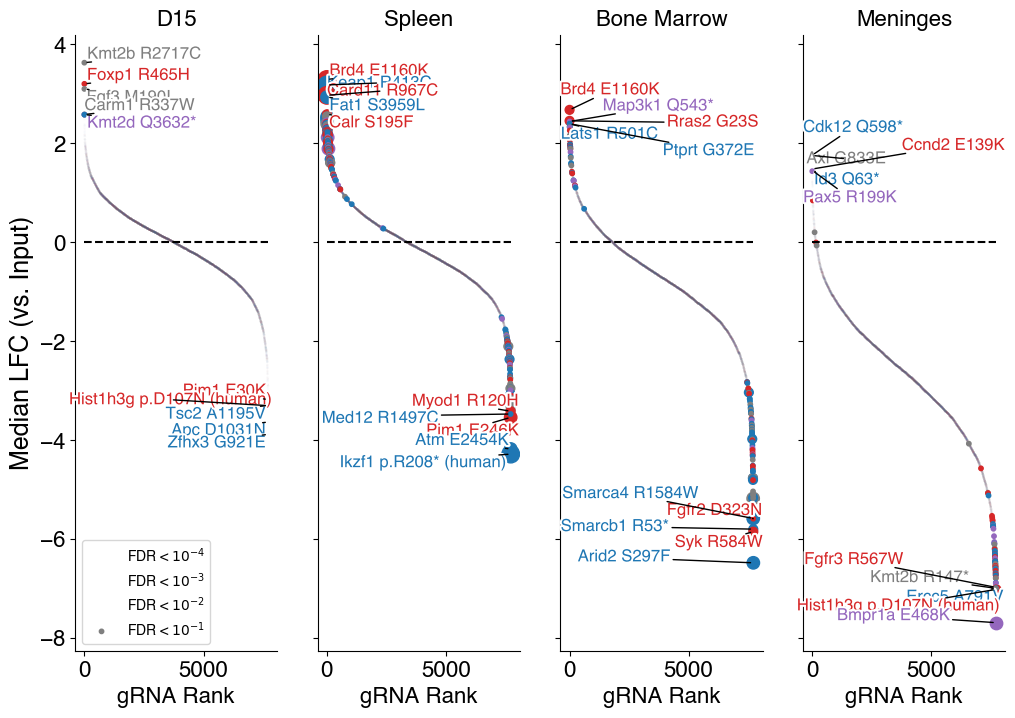

In [68]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20
FDR_cutoff = .1
min_input_counts = 2

CBE_targ = CBE_LFC_FDR[(CBE_LFC_FDR['classification']=='targeting guide')& (CBE_LFC_FDR['target_base_edit_perc']>=min_edit) & (CBE_LFC_FDR['Input_median']>=20)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by significance level

    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'], color=cc2_other['color'], s=1, alpha=.01)

    FDR_cutoffs = [10**-4, 10**-3, 10**-2, 10**-1]

    size_dict = dict(zip(FDR_cutoffs, [160,80,40,10]))
    label_dict = dict(zip(FDR_cutoffs, ['FDR < $10^{-4}$', 'FDR < $10^{-3}$', 'FDR < $10^{-2}$', 'FDR < $10^{-1}$']))

    for id1, cut in enumerate(FDR_cutoffs):
        if id1==0:
            cc2_sig = cc2[cc2[f'FDR_{val}']<cut]
            
        else:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) & (cc2[f'FDR_{val}']>=FDR_cutoffs[id1-1])]

        ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut])

    if k==0:
        ax[k].legend()

    #------making plot pretty------

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    top = cc2[:5]
    bottom = cc2[-5:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

In [72]:
CBE_LFC_FDR.sort_values(by='LFC_median_meninges', ascending=False)[['Gene', 'FDR_meninges', 'LFC_median_meninges', 'Input_median']][:20]

,Gene,FDR_meninges,LFC_median_meninges,Input_median
1563,Btk,0.003101,3.588678,14.048130
11074,Stag2,0.014520,2.939840,0.232668
7089,Nf1,0.000266,2.803625,0.054597
12282,safe_target,0.032750,2.680392,0.604221
9365,Ptprt,0.060689,2.225475,1.263054
9531,Rad50,0.020494,2.201261,4.354213
12249,safe_target,0.161097,2.166691,3.121807
9352,Ptprt,0.101085,2.158406,14.652351
7978,Pdgfrb,0.057692,2.129909,30.944828
8826,Prex2,0.032750,2.125349,22.809330
